<center><h1> Hands Movement<h1><center>

#### What is the hands Movement dataset

This is a data set of an experiment were 12 peoples hand movments were recorde for a period of time, the recorded hand movments were of a person alone, 2 people moving their hands in sync and 2 people moving their hand however they want.

#### What is the goal if this Model?

the goal is  to try make a model which can if given frame of time know if the movement was done alone, in sync or spontanious

### Feature description

**Time:** The time at which the frame was taken

**Frame ID:** ID of the Frame

**Hand Type** Left or Right hand

**hands** how many hands were recorded during this frame

**Position X** hand postion on the x axis

**Position Y** hand postion on the y axis

**Position Z** hand postion on the z axis (height)

**Velocity X** hand movement Velocity on the X axis

**Velocity Y** hand movement Velocity on the Y axis

**Velocity Z** hand movement Velocity on the Z axis

**Pitch** hand position (the position of the hand up or down compared to your wrist an example: stop sign would be 1 and puting the hand horizontal would be 0)

**Roll** hand position (how much is the hand rolled, holdin your hand horizontal would be 0)

**Yaw** hand position (the position of the hand to the rigth or left compared to your wrist)

**Wrist Pos X** wrist postion on the x axis

**Wrist Pos Y** wrist postion on the y axis

**Wrist Pos Z** wrist postion on the z axis

**Elbow pos X** wrist postion on the x axis

**Elbow pos Y** wrist postion on the y axis

**Elbow pos Z** wrist postion on the z axis

**Grab Strenth** only has 0,1: 0 for an open hand and 1 for a closed one

**Grab Angle** how closed the hand is: 0 for an open hend and 1 for closed one

**Pinch Strength** ???

## Libraries

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import os
import cv2
import math

import warnings
warnings.filterwarnings('ignore')

## Get the Data

### Create a df

We will first want to create the data frame so we can work on them, the 7 first second can be deleted from the start

In [95]:
def Create_df_without_7_sec(path):
    df = pd.read_csv(path)
    time_to_drop=math.ceil(df["Time"][0])+7
    df=df[df["Time"]>time_to_drop]
    return df

**Train Set**

In [172]:
#Spontan
#Evyatar_Spon = Create_df_without_7_sec("csv folder/Hand_Movement/Training/Evyatar Cohen/Evyatar636771050011691836Spontan.csv")
Nofar_Spon = Create_df_without_7_sec("csv folder/Hand_Movement/Training/Nofar Social_Nuero/Nofar636759792183061005Spontan.csv")

Spon_List_train = [Evyatar_Spon]

#Sync
#Evyatar_Sync = Create_df_without_7_sec("csv folder/Hand_Movement/Training/Evyatar Cohen/Evyatar636771050902934708Sync.csv")
Nofar_Sync = Create_df_without_7_sec("csv folder/Hand_Movement/Training/Nofar Social_Nuero/Nofar636759794200223541Sync.csv")

Sync_List_train = [Evyatar_Sync]

#Alone
#Evyatar_Alone = Create_df_without_7_sec("csv folder/Hand_Movement/Training/Evyatar Cohen/Evyatar636771051823980826Alone.csv")
Nofar_Alone = Create_df_without_7_sec("csv folder/Hand_Movement/Training/Nofar Social_Nuero/Nofar636759793193137655Alone.csv")

Alone_List_train = [Evyatar_Alone]


**Test Set:**

In [65]:
#Spontan
#Evyatar_Spon = Create_df_without_7_sec("csv folder/Hand_Movement/Training/Evyatar Cohen/Evyatar636771050011691836Spontan.csv")

Spon_List_test = [Evyatar_Spon]

#Sync
#Evyatar_Sync = Create_df_without_7_sec("csv folder/Hand_Movement/Training/Evyatar Cohen/Evyatar636771050902934708Sync.csv")

Sync_List_test = [Evyatar_Sync]

#Alone
#Evyatar_Alone = Create_df_without_7_sec("csv folder/Hand_Movement/Training/Evyatar Cohen/Evyatar636771051823980826Alone.csv")

Alone_List_test = [Evyatar_Alone]


In [174]:
Nofar_Spon.head()

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
926,93.00004,11725,right,2,112.1729,165.6832,69.03363,46.50423,-171.1805,30.09819,...,-0.965512,172.9886,182.2604,101.70350,369.5180,63.23082,217.1309,0.0,0.378158,0.0
927,93.00004,11725,left,2,-174.1331,185.0220,79.45733,73.58780,-179.8639,169.64290,...,1.917869,-224.7415,139.7812,56.73923,-398.2293,-44.49225,102.1335,0.0,0.263475,0.0
928,93.01683,11727,right,2,111.6897,161.5403,68.15795,-27.29169,-231.8569,-47.43299,...,-0.964016,171.9324,178.7851,101.13750,359.0345,53.75314,225.5366,0.0,0.421244,0.0
929,93.01683,11727,left,2,-173.3174,182.4539,82.47641,44.02934,-141.0067,176.16080,...,1.929541,-224.8252,138.8770,58.69298,-395.1419,-48.83277,101.9668,0.0,0.241042,0.0
930,93.03379,11729,right,2,111.4815,158.0019,67.43507,-11.62146,-201.5034,-45.16769,...,-0.969727,171.2532,176.6963,100.26620,352.6319,54.04668,235.0779,0.0,0.457663,0.0


We can See that the index doesnt start at 1 so it worked

### Combine data frames of the same type

**Train Set**

In [175]:
Spon_df_train = pd.concat(Spon_List_train)
Sync_df_train = pd.concat(Sync_List_train)
Alone_df_train = pd.concat(Alone_List_train)
#check if it worked
print("Shape of Spontan train data frame: ",Spon_df_train.shape)
print("Shape of Sync train data frame: ",Sync_df_train.shape)
print("Shape of Alone train data frame: ",Alone_df_train.shape)

Shape of Spontan train data frame:  (8136, 22)
Shape of Sync train data frame:  (8152, 22)
Shape of Alone train data frame:  (4032, 22)


**Test Set:**

In [ ]:
Spon_df_test = pd.concat(Spon_List_test)
Sync_df_test = pd.concat(Sync_List_test)
Alone_df_test = pd.concat(Alone_List_test)
#check if it worked
print("Shape of Spontan test data frame: ",Spon_df_test.shape)
print("Shape of Sync test data frame: ",Sync_df_test.shape)
print("Shape of Alone test data frame: ",Alone_df_test.shape)

### Data Cleaning

In [176]:
def Cleaning_Spon_Sync(df):
    df2 = df[df[' # hands'] == 2]
    return df2

In [177]:
def Cleaning_Alone(df):
    df2 = df[df[' Hand Type'] == 'left']
    df3 = df2[df[' # hands'] == 1]
    return df3

In [178]:
def Cleaning_Right_hand(df):
    df2 = df[df[' Hand Type'] == 'right']
    df3 = df2[df[' # hands'] == 1]
    return df3

**Right Hand Set**

In [179]:
Right_Hand = pd.read_csv('csv folder/Hand_Movement/HandRight.csv')
Right_Hand = Cleaning_Right_hand(Right_Hand)

In [180]:
Right_Hand

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,128.2883,15478,right,1,15.671670,226.2064,20.264700,34.26665,-195.214700,-35.043020,...,-0.277800,46.88831,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0
1,128.3048,15480,right,1,16.241190,222.9389,20.117810,36.16443,-180.093900,-4.052799,...,-0.277763,47.54861,205.6568,86.42250,203.9553,47.88272,238.4482,0.0,0.243050,0.0
2,128.3218,15482,right,1,16.724610,220.9709,19.949720,26.35298,-95.088190,-11.157620,...,-0.278792,48.15030,204.5182,86.35149,204.6231,45.35921,236.8544,0.0,0.281134,0.0
3,128.3384,15484,right,1,17.090160,219.7124,19.676790,19.46804,-61.755180,-21.303780,...,-0.279768,48.64175,203.9989,86.16056,204.9939,44.18692,236.0927,0.0,0.277691,0.0
4,128.3551,15486,right,1,17.460170,219.3652,19.131280,21.94964,-8.355943,-35.081790,...,-0.278629,48.93135,203.3777,85.59017,204.5952,42.68003,235.2896,0.0,0.283008,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4807,208.1942,24687,right,1,-15.404800,208.0276,9.980799,167.86240,510.085200,-105.529500,...,-0.282299,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.503490,0.0
4808,208.2108,24689,right,1,-12.678650,218.1196,9.314082,145.00970,562.359400,-20.707010,...,-0.263492,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.403687,0.0
4809,208.2276,24691,right,1,-9.643562,228.2807,9.722980,180.42160,591.901900,28.880570,...,-0.234336,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.310940,0.0
4810,208.2443,24692,right,1,-7.980715,233.5056,10.419080,192.45930,604.734400,80.566980,...,-0.222084,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.286526,0.0


**Train Set**

In [181]:
Spon_df_train = Cleaning_Spon_Sync(Spon_df_train)
Sync_df_train = Cleaning_Spon_Sync(Sync_df_train)
Alone_df_train = Cleaning_Alone(Alone_df_train)

**Test Set:**

In [ ]:
Spon_df_test = Cleaning_Spon_Sync(Spon_df_test)
Sync_df_test = Cleaning_Spon_Sync(Sync_df_test)
Alone_df_test = Cleaning_Alone(Alone_df_test)

### Combine Right and left hand

In [182]:
def Combine_Hands_Spon_Sync(df):
    hand_Type = df.groupby(df[' Hand Type'])
    right = hand_Type.get_group("right")
    left = hand_Type.get_group("left")
    df = pd.merge(left, right, how='left', on= ' Frame ID')
    return df

In [183]:
def Combine_Hands_Alone(df,Right_Hand):
    Right_Hand = Right_Hand.reset_index(drop=True)
    df=df.reset_index(drop=True)
    df= pd.merge(df,Right_Hand,left_index=True,right_index=True,how='left')
    return df

**Right Hand Set**

In [184]:
print("Shape of Alone: ",Alone_df_train.shape," ,Compared to the Shape Right Hand ",Right_Hand.shape)

Shape of Alone:  (3948, 22)  ,Compared to the Shape Right Hand  (4698, 22)


We have to make Right_Hand Artfically bigger

In [185]:
New_HandRight = pd.DataFrame()
for i in range(9):
    New_HandRight = pd.concat([New_HandRight,Right_Hand])

**Train Set**

In [186]:
Spon_df_train = Combine_Hands_Spon_Sync(Spon_df_train)
Sync_df_train = Combine_Hands_Spon_Sync(Sync_df_train)
Alone_df_train = Combine_Hands_Alone(Alone_df_train,New_HandRight)
#check if it worked
print("Shape of Spontan train data frame: ",Spon_df_train.shape)
print("Shape of Sync train data frame: ",Sync_df_train.shape)
print("Shape of Alone train data frame: ",Alone_df_train.shape)

Shape of Spontan train data frame:  (4069, 43)
Shape of Sync train data frame:  (4078, 43)
Shape of Alone train data frame:  (3948, 44)


**Test Set:**

In [ ]:
Spon_df_test = Cleaning_Spon_Sync(Spon_df_test)
Sync_df_test = Cleaning_Spon_Sync(Sync_df_test)
Alone_df_test = Cleaning_Alone(Alone_df_test,New_HandRight)
#check if it worked
print("Shape of Spontan test data frame: ",Spon_df_test.shape)
print("Shape of Sync test data frame: ",Sync_df_test.shape)
print("Shape of Alone test data frame: ",Alone_df_test.shape)

### Removing features

There a few features we need to remove because they will destroy or distrub the models

- Frame ID - the iD wont help the model learning anything and could even disturb the model
- num hands - if the models the number of hands it will be way to easy to know which is alone
- hand Type - every row has left and right after the combination so it is not really helpfull
- Time - every row is the data for a frame and it wont matter when it was, the data describing the moment is whats importent

In [187]:
def DeleteFeatures_Spon_Sync(df):
    df.drop(['Time_x','Time_y',' Frame ID',' Hand Type_x',' Hand Type_y',' # hands_x',' # hands_y'], inplace = True, axis = 1)
    return df

In [188]:
def DeleteFeatures_Alone(df):
    df.drop(['Time_x','Time_y',' Frame ID_x',' Frame ID_y',' Hand Type_x',' Hand Type_y',' # hands_x',' # hands_y'], inplace = True, axis = 1)
    return df

**Train Set**

In [189]:
Spon_df_train = DeleteFeatures_Spon_Sync(Spon_df_train)
Sync_df_train = DeleteFeatures_Spon_Sync(Sync_df_train)
Alone_df_train = DeleteFeatures_Alone(Alone_df_train)

In [191]:
Spon_df_train.head()

,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,Pitch_x,Roll_x,Yaw_x,Wrist Pos X_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,-120.9901,233.4971,111.1945,13.72480,16.62460,-36.05895,2.245895,0.896062,2.443295,-156.9168,...,-1.426339,196.5415,202.3501,79.17751,352.0142,5.932353,100.8471,0.0,0.435941,0.0
1,-120.6852,233.7579,109.8565,12.63542,21.27728,-87.90247,2.231368,0.898995,2.429476,-156.7636,...,-1.368646,198.2091,202.9526,78.34356,348.7110,3.047308,103.0070,0.0,0.432877,0.0
2,-120.6262,234.0069,107.7924,-12.91048,25.46214,-121.80650,2.217923,0.903613,2.401253,-157.6457,...,-1.301656,198.7160,202.5023,77.00478,344.4654,-0.121636,107.3668,0.0,0.419624,0.0
3,-120.3041,234.9940,105.7214,28.58613,84.11961,-116.71390,2.202032,0.909588,2.391383,-157.3797,...,-1.226411,199.1423,201.5152,75.27981,337.1216,-5.943414,109.1011,0.0,0.418503,0.0
4,-120.2516,237.1003,103.8627,-27.60667,153.09450,-95.06477,2.184623,0.915921,2.379576,-157.4027,...,-1.145465,198.7193,199.6836,73.00286,330.5596,-11.418840,108.7120,0.0,0.405120,0.0


**Test Set:**

In [ ]:
Spon_df_test = DeleteFeatures_Spon_Sync(Spon_df_test)
Sync_df_test = DeleteFeatures_Spon_Sync(Sync_df_test)
Alone_df_test = DeleteFeatures_Alone(Alone_df_test)

### Adding Label

In [192]:
def Label_Spon(df):
    df.insert(loc=1,column='label', value = 1)
    return df

In [193]:
def Label_Sync(df):
    df.insert(loc=1,column='label', value = 2)
    return df

In [194]:
def Label_Alone(df):
    df.insert(loc=1,column='label', value = 3)
    return df

**Train Set**

In [198]:
Spon_df_train = Label_Spon(Spon_df_train)
Sync_df_train = Label_Sync(Sync_df_train)
Alone_df_train = Label_Alone(Alone_df_train)

In [200]:
Alone_df_train.head()

,Position X_x,label,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,Pitch_x,Roll_x,Yaw_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,-85.08522,3,222.6438,103.57570,258.7664,-292.7327,-311.5475,2.070810,0.310204,1.794112,...,-0.277800,46.88831,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0
1,-79.64585,3,215.0029,97.35830,325.7987,-443.0362,-356.4362,2.119173,0.265026,1.791789,...,-0.277763,47.54861,205.6568,86.42250,203.9553,47.88272,238.4482,0.0,0.243050,0.0
2,-77.00866,3,210.4713,94.14806,301.6342,-518.3123,-367.1778,2.157780,0.240737,1.797294,...,-0.278792,48.15030,204.5182,86.35149,204.6231,45.35921,236.8544,0.0,0.281134,0.0
3,-72.60887,3,201.3980,88.68137,308.2110,-494.3976,-273.4683,2.251470,0.176647,1.796813,...,-0.279768,48.64175,203.9989,86.16056,204.9939,44.18692,236.0927,0.0,0.277691,0.0
4,-67.46555,3,192.7061,84.36688,326.2769,-600.0226,-279.9649,2.392350,0.114381,1.801773,...,-0.278629,48.93135,203.3777,85.59017,204.5952,42.68003,235.2896,0.0,0.283008,0.0


**Test Set:**

In [ ]:
Spon_df_test = Label_Spon(Spon_df_test)
Sync_df_test = Label_Sync(Sync_df_test)
Alone_df_test = Label_Alone(Alone_df_test)

### Combining Data frames

**Train Set**

In [201]:
Train_dfs = [Spon_df_train,Sync_df_train,Alone_df_train]
train = pd.concat(Train_dfs)
print("Shape of the Train Data frame: ",train.shape)

Shape of the Train Data frame:  (12095, 37)


**Test Set:**

In [ ]:
Test_dfs = [Spon_df_test,Sync_df_test,Alone_df_test]
test = pd.concat(Test_dfs)
print("Shape of the Test Data frame: ",test.shape)

### Final Touch
we should not take every thing, there should be a time diffrence the rows so the machine learning can see the diffrence time makes better

**Train Set**

In [202]:
Train_Copy = train.copy()
Train_Copy = Train_Copy.iloc[::5, :]
Train_Copy = Train_Copy.reset_index()
Train_Copy = Train_Copy.drop(['index'], axis = 1)
Train_Copy

,Position X_x,label,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,Pitch_x,Roll_x,Yaw_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,-120.9901,1,233.4971,111.19450,13.724800,16.62460,-36.058950,2.245895,0.896062,2.443295,...,-1.426339,196.54150,202.3501,79.17751,352.0142,5.932353,100.8471,0.000000,0.435941,0.000000
1,-120.8008,1,241.3125,102.40210,-23.646120,228.61040,-95.037460,2.165358,0.907764,2.338571,...,-1.065760,197.92430,197.6431,70.18703,327.0169,-15.443070,104.1074,0.000000,0.448658,0.000000
2,-120.5548,1,255.9027,92.60551,40.424920,217.22600,-148.474700,2.067071,0.926493,2.243386,...,-0.735775,194.10460,187.1925,55.54297,351.0478,-3.882342,101.1552,0.189583,1.020048,0.000000
3,-122.0487,1,276.0147,76.93995,-0.572427,208.35580,-217.390600,1.938174,0.936479,2.093880,...,-0.459121,188.68300,175.9269,41.16344,313.8484,-27.516200,119.6858,0.056103,0.868108,0.000000
4,-122.9406,1,289.6123,59.58008,-10.571240,166.56460,-170.305900,1.799684,1.011487,1.956363,...,-0.260620,185.58970,172.2741,33.65371,287.2656,-30.986680,141.2098,0.130465,1.098361,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414,-101.5491,3,207.9393,29.29619,-28.004490,255.10330,20.493780,1.468792,0.278809,1.540820,...,-0.099138,29.85371,135.9945,51.18493,131.5080,58.993210,291.1895,0.000000,0.203809,0.000000
2415,-105.2769,3,225.5970,29.45939,-70.554130,248.87260,9.633136,1.534533,0.288571,1.559921,...,-0.111482,28.57614,143.1370,66.34518,136.6357,52.553620,298.6871,0.000000,0.223859,0.000000
2416,-105.7652,3,226.9232,27.97449,-11.579100,-99.58132,-44.295560,1.087544,0.136872,1.488394,...,-0.160974,23.85195,165.7114,101.66940,159.2857,37.539360,299.3930,0.000000,0.396521,0.000000
2417,-105.6855,3,218.1592,26.43787,34.370490,-184.69860,-18.356330,0.761610,0.083840,1.468131,...,-0.185212,17.14493,192.2495,150.28490,159.7084,3.204254,283.6066,0.000000,0.590791,0.000000


**Test Set:**

In [ ]:
Test_Copy = test.copy()
Test_Copy = Test_Copy.iloc[::5, :]
Test_Copy = Test_Copy.reset_index()
Test_Copy = Test_Copy.drop(['index'], axis = 1)
Test_Copy

## Getting insight of the Data

<function matplotlib.pyplot.show(close=None, block=None)>

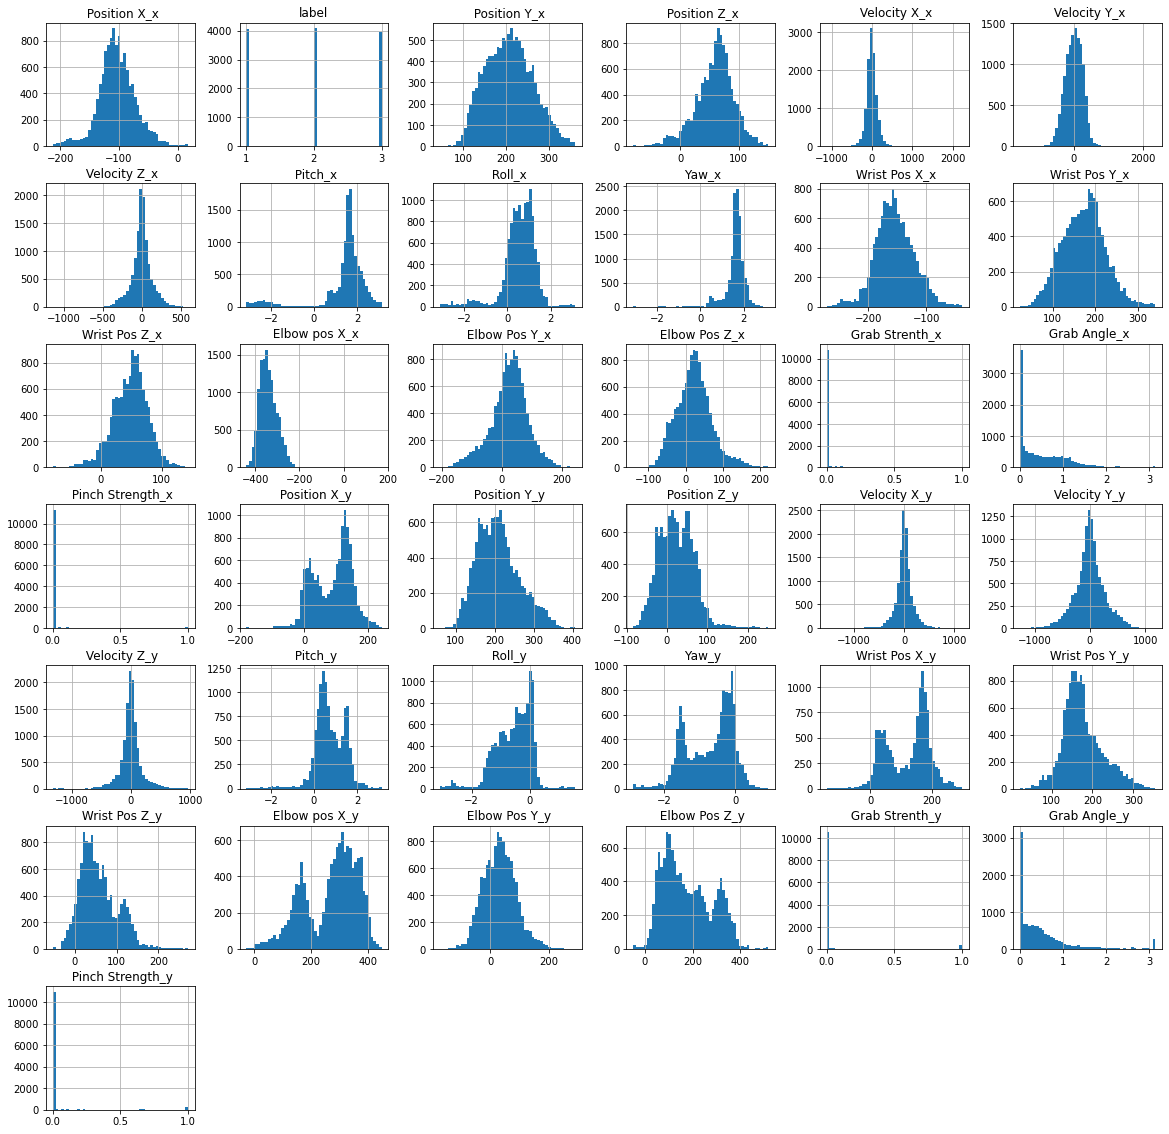

In [205]:
train.hist(bins = 50, figsize = (20,20))
plt.show

In [ ]:
# Histogram of all numeric features
FinalDfHands.hist(bins=50, figsize=(20,15))
plt.show()

## Create a Test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Make copy to avoid changing original data
dfCopy = df.copy()

#first lets split the data for training and testing
X= dfCopy.drop(["Target_feature"],axis =1)
y= dfCopy["Target_feature"]\

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=7)

## Model Preproccesing

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

We want to use Pca so we need to normalize the data first, Lets creat a pipeline which does it in one go

### Preprocessing Pipeline

We want use pca so we first have to normalize the data with a scaler.

In [276]:
pre_process = Pipeline([
    ('scaler',StandardScaler()),
    ('pca',PCA(n_components=0.95))])

### Transforming the data

In [ ]:
# we will preprocess the data
X_train_transformed = pre_process.fit_transform(X_train)
X_test_transformed = pre_process.transform(X_test)
X_train_transformed

## Model Training

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### KNN

In [ ]:
#fit the model
Knn = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
Knn.fit(X_train_transformed,y_train)

#make predictions
PredicKnn = Knn.predict(X_test_transformed)

#evaluate predictions
confmat = confusion_matrix(y_test, PredicKnn)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep = classification_report(y_test, PredicKnn)
Knn_score = accuracy_score(y_test, PredicKnn)
print(class_rep)
print("Accuracy: ", Knn_score)

### Logistic Regression

In [ ]:
#fit the model
logR = LogisticRegression(random_state=42, n_jobs=-1)
logR.fit(X_train_transformed,y_train)

#make predictions
PredicLogR = logR.predict(X_test_transformed)

#evaluate predictions
confmat = confusion_matrix(y_test, PredicLogR)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep = classification_report(y_test, PredicLogR)
logR_score = accuracy_score(y_test, PredicLogR)
print(class_rep)
print("Accuracy: ", logR_score)

### Desicion Tree

In [ ]:
#fit the model
dTree = DecisionTreeClassifier(random_state=42)
dTree.fit(X_train_transformed,y_train)

#make predictions
PredicDeTree = dTree.predict(X_test_transformed)

#evaluate predictions
confmat = confusion_matrix(y_test, PredicDeTree)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep = classification_report(y_test, PredicDeTree)
dTree_score = accuracy_score(y_test, PredicDeTree)
print(class_rep)
print("Accuracy: ", dTree_score)

### Random Forest

In [ ]:
#fit the model
RFor = RandomForestClassifier(random_state=42)
RFor.fit(X_train_transformed,y_train)

#make predictions
PredicRFor = RFor.predict(X_test_transformed)

#evaluate predictions
confmat = confusion_matrix(y_test, PredicRFor)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep = classification_report(y_test, PredicRFor)
RFor_score = accuracy_score(y_test, PredicRFor)
print(class_rep)
print("Accuracy: ", RFor_score)

### Gradient Boost

In [ ]:
#fit the model
gradB = GradientBoostingClassifier(random_state=42)
gradB.fit(X_train_transformed,y_train)

#make predictions
PredicGradB = gradB.predict(X_test_transformed)

#evaluate predictions
confmat = confusion_matrix(y_test, PredicGradB)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep = classification_report(y_test, PredicGradB)
gradB_score = accuracy_score(y_test, PredicGradB)
print(class_rep)
print("Accuracy: ", gradB_score)

### Ada Boost

In [ ]:
adaB = AdaBoostClassifier(dTree,random_state=42)
adaB.fit(X_train_transformed,y_train)

#make predictions
PredicAdaB = adaB.predict(X_test_transformed)

#evaluate predictions
confmat = confusion_matrix(y_test, PredicAdaB)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep = classification_report(y_test, PredicAdaB)
adaB_score = accuracy_score(y_test, PredicAdaB)
print(class_rep)
print("Accuracy: ", adaB_score)

### XG boost

In [ ]:
#fit the model
xgB = XGBClassifier(random_state=42,n_jobs=-1)
xgB.fit(X_train_transformed,y_train)

#make predictions
PredicXgb = xgB.predict(X_test_transformed)

#evaluate predictions
confmat = confusion_matrix(y_test, PredicXgb)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep = classification_report(y_test, PredicXgb)
xgB_score = accuracy_score(y_test, PredicXgb)
print(class_rep)
print("Accuracy: ", xgB_score)

### Bagging

In [ ]:
#fit the model
bagN = BaggingClassifier(Knn)
bagN.fit(X_train_transformed,y_train)

#make predictions
PredicBagN = bagN.predict(X_test_transformed)

#evaluate predictions
confmat = confusion_matrix(y_test, PredicBagN)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep = classification_report(y_test, PredicBagN)
bagN_score = accuracy_score(y_test, PredicBagN)
print(class_rep)
print("Accuracy: ", bagN_score)

### Stacking

In [ ]:
#fit the model
estimators=[
    ('Logistic Regression',logR_grid_Search),
    ('Random Forest',RFor_grid_Search),
    ('GRadient Boosting',gradB_grid_Search)]
Stk = StackingClassifier(estimators = estimators,final_estimator= xgB_grid_Search)
Stk.fit(X_train_transformed,Y_train)

#make predictions
PredicStk = Stk.predict(X_test_transformed)
#evaluate predictions
confmat = confusion_matrix(Y_test, PredicStk)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep = classification_report(Y_test, PredicStk)
Stk_score = accuracy_score(Y_test, PredicStk)
print(class_rep1)
print("Accuracy: ", Stk_score)

## Model Evaluation

In [ ]:
Scores = pd.DataFrame({
    'Model':['KNeighborsClassifier','LogisticRegressionClassifier','DecisionTreeClassifier','RandomForestClassifier','GradientBoostClassifier','AdaBoostClassifier','XGBoostClassifier','BaggingClassifier','StackingClassifier'],
    'Accuracy':[Knn_score,logR_score,dTree_score,RFor_score,gradB_score,adaB_score,xgB_score,bagN_score,Stk_score]})
Scores

### Conclusion

**Which is the best classifier?**

In [315]:
print("The best Classifier is Stacking with a Accuracy of ",Scores['Accuracy'].max())

The best Classifier is Stacking with a Accuracy of  0.64736


**Is it really the best classifier?**

I think XgBoost is better than Stacking, Accuracy wise Stacking is better but there is only a diffrence of 0.00528 but stacking ran 6 times as long as Xg Boost.